## H1N1 Vaccine Uptake Prediction

## Business Understanding

Influenza vaccines play a critical role in reducing the spread and severity of flu outbreaks. Despite the availability of the H1N1 vaccine following the 2009 pandemic, vaccine uptake remained uneven due to factors such as risk perception, misinformation, and behavioral attitudes.

This project aims to predict whether an individual received the H1N1 vaccine using demographic information, health behaviors, and personal opinions collected from the National 2009 H1N1 Flu Survey. The primary stakeholders are public health officials and policymakers, who can use these insights to design targeted vaccination campaigns and address vaccine hesitancy.

The scope of this project is limited to predicting vaccine uptake and identifying influential factors. It does not evaluate vaccine effectiveness, distribution logistics, or policy outcomes.

# Data Understanding

The data for this project comes from three datasets: `training_set_features.csv`, `test_set_features.csv`, and `training_set_labels.csv`. The primary target variable for this analysis is whether an individual received the H1N1 vaccine (`h1n1_vaccine`), while predictors include demographic, health-related, and behavioral features such as age, income, health concerns, and vaccination recommendations.

The datasets contain both categorical (e.g., age group, marital status) and numerical (e.g., household adults,household children ) features, including some binary and ordinal variables. The size and distribution of the datasets will be examined during exploration. If necessary, resampling techniques may be applied to address imbalances in the target variable.

The data is collected via surveys, which means it may include missing values, biases, or inconsistencies. These issues will require careful cleaning and preprocessing before building predictive models. 


# Data Preparation

In [17]:
# import pandas
import pandas as pd

# Loading the training features 
training_features_df = pd.read_csv("./Data/training_set_features.csv")

# Displaying the first few rows
training_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [18]:
# loading training_labels 
training_labels_df = pd.read_csv("./Data/training_set_labels.csv")

# Displaying the first few rows
training_labels_df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [19]:
# loading test_features
test_features_df = pd.read_csv("./Data/test_set_features.csv")

# Displaying the first few rows
test_features_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [20]:
# checking for missing values in the training_features_df
missing_values = training_features_df.isnull().sum()
print(missing_values)
# check the shape of the dataframe
training_features_df.shape

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

(26707, 36)

In [21]:
#checking for missing values in the test_features_df
missing_values2 = test_features_df.isnull().sum()
print(missing_values2)

#check the shape of the dataframe
test_features_df.shape

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

(26708, 36)

From the findings above we can see that some columns have relatively small numbers of missing values, such as h1n1_concern (92 missing) and behavioral_face_mask (19 missing).

However, certain columns have a very large number of missing values, like doctor_recc_h1n1, doctor_recc_seasonal, health_insurance, and others related to employment (employment_industry, employment_occupation), which have thousands of missing entries.

The dataset has 26,707 rows and 36 columns

In [22]:
# Display summary of the DataFrame
training_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

### Consider Dropping Rows or Columns

For columns have an excessive amount of missing data such as employment_occupation or employment_industry drop them entirely

In [23]:
# Drop columns with too many missing values 
training_features_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)
test_features_df.drop(columns=['employment_industry', 'employment_occupation'], inplace=True)

Numerical Columns: Use strategies such as the mean, median, or mode for imputation depending on the distribution of the data.

Categorical Columns: Replace missing values with the mode or a placeholder value like "Unknown".

In [24]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns with the median
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 
                  'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 
                  'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 
                  'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 
                  'child_under_6_months', 'health_worker', 'health_insurance', 
                  'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 
                  'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 
                  'household_adults', 'household_children']

numerical_imputer = SimpleImputer(strategy='median')  
numerical_imputer.fit(training_features_df[numerical_cols]) 

SimpleImputer(strategy='median')

In [25]:
# Transform both training and test datasets
training_features_df[numerical_cols] = numerical_imputer.transform(training_features_df[numerical_cols])
test_features_df[numerical_cols] = numerical_imputer.transform(test_features_df[numerical_cols])

In [26]:
# Impute missing values for categorical columns with the mode (most frequent value)
categorical_cols = ['education', 'income_poverty', 'marital_status', 'rent_or_own', 
                    'employment_status']

categorical_imputer = SimpleImputer(strategy='most_frequent')  
categorical_imputer.fit(training_features_df[categorical_cols])

# Transform both training and test datasets
training_features_df[categorical_cols] = categorical_imputer.transform(training_features_df[categorical_cols])
test_features_df[categorical_cols] = categorical_imputer.transform(test_features_df[categorical_cols])

In [27]:
# Verify there are no remaining missing values
print(training_features_df.isnull().sum().sum())
print(test_features_df.isnull().sum().sum())


0
0


From the findings above we can see that some columns have relatively small numbers of missing values, such as h1n1_concern (85 missing) and behavioral_face_mask (19 missing).

However, certain columns have a very large number of missing values, like doctor_recc_h1n1, doctor_recc_seasonal, health_insurance, and others related to employment (employment_industry, employment_occupation), which have thousands of missing entries.

In [28]:
#checking for missing values in the training_labels_df
missing_values2 = training_labels_df.isnull().sum()
print(missing_values2)
#check the shape of the dataframe
training_labels_df.shape

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64


(26707, 3)

From the findings above we can see that the training_labels_df doesn't contain any missing values

### Checking for Duplicates
Duplicate records in a dataset can skew analysis and negatively impact model performance.

In [29]:
# Check for duplicate rows
duplicate_rows = training_features_df[training_features_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children]
Index: []

[0 rows x 34 columns]


In [30]:
#Check for duplicate rows
duplicate_rows = test_features_df[test_features_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_concern, h1n1_knowledge, behavioral_antiviral_meds, behavioral_avoidance, behavioral_face_mask, behavioral_wash_hands, behavioral_large_gatherings, behavioral_outside_home, behavioral_touch_face, doctor_recc_h1n1, doctor_recc_seasonal, chronic_med_condition, child_under_6_months, health_worker, health_insurance, opinion_h1n1_vacc_effective, opinion_h1n1_risk, opinion_h1n1_sick_from_vacc, opinion_seas_vacc_effective, opinion_seas_risk, opinion_seas_sick_from_vacc, age_group, education, race, sex, income_poverty, marital_status, rent_or_own, employment_status, hhs_geo_region, census_msa, household_adults, household_children]
Index: []

[0 rows x 34 columns]


In [31]:
duplicate_rows = training_labels_df[training_labels_df.duplicated()]

# Display duplicate rows
print(f"Number of duplicate rows: {len(duplicate_rows)}")
print(duplicate_rows)

Number of duplicate rows: 0
Empty DataFrame
Columns: [respondent_id, h1n1_vaccine, seasonal_vaccine]
Index: []


After checking for duplicates, we found none in the dataset.

## Data Visualizations
### Distribution of Target Variables
Purpose:Understand the balance of target variables (h1n1_vaccine).

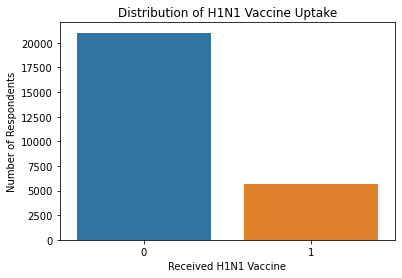

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='h1n1_vaccine', data=training_labels_df)
plt.title('Distribution of H1N1 Vaccine Uptake')
plt.xlabel('Received H1N1 Vaccine')
plt.ylabel('Number of Respondents')
plt.show()


H1N1 Vaccine Distribution:

The majority of respondents (label 0) did not receive the H1N1 vaccine. A smaller proportion of respondents (label 1) received the vaccine. This indicates an imbalance in the target variable, as the number of people who did not take the H1N1 vaccine is significantly higher than those who did.


#### Doctor Recommendation vs H1N1 Vaccine Uptake

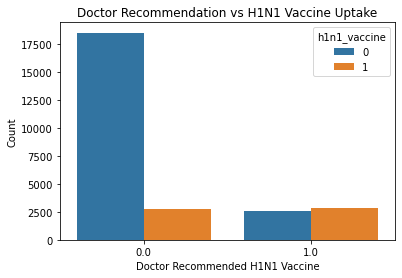

In [33]:
sns.countplot(
    data=training_features_df.join(training_labels_df['h1n1_vaccine']),
    x='doctor_recc_h1n1',
    hue='h1n1_vaccine'
)
plt.title('Doctor Recommendation vs H1N1 Vaccine Uptake')
plt.xlabel('Doctor Recommended H1N1 Vaccine')
plt.ylabel('Count')
plt.show()


#### Risk Perception vs Vaccine Uptake

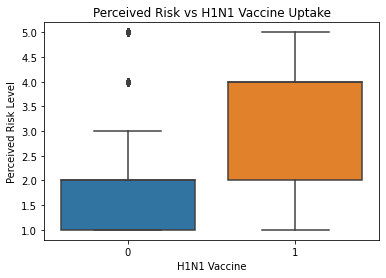

In [34]:
sns.boxplot(
    data=training_features_df.join(training_labels_df['h1n1_vaccine']),
    x='h1n1_vaccine',
    y='opinion_h1n1_risk'
)
plt.title('Perceived Risk vs H1N1 Vaccine Uptake')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Perceived Risk Level')
plt.show()


#### Concern Level vs Vaccine Uptake

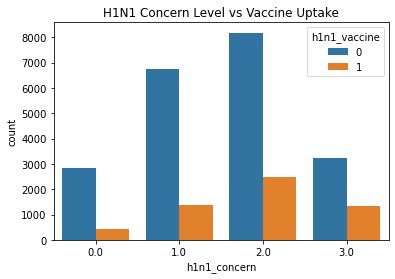

In [35]:
sns.countplot(
    data=training_features_df.join(training_labels_df['h1n1_vaccine']),
    x='h1n1_concern',
    hue='h1n1_vaccine'
)
plt.title('H1N1 Concern Level vs Vaccine Uptake')
plt.show()


### Vaccine Uptake by Income Level
Purpose: Understand how income_poverty influences vaccine uptake.


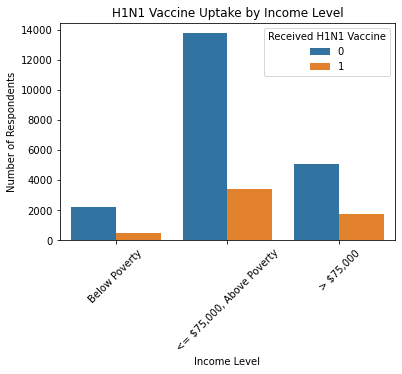

In [36]:
merged_train = training_features_df.merge(
    training_labels_df[['respondent_id', 'h1n1_vaccine']],
    on='respondent_id'
)

sns.countplot(
    data=merged_train,
    x='income_poverty',
    hue='h1n1_vaccine'
)

plt.title('H1N1 Vaccine Uptake by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Number of Respondents')
plt.legend(title='Received H1N1 Vaccine')
plt.xticks(rotation=45)
plt.show()



The ≤ $75,000 (above poverty) group represents the largest proportion of respondents, yet exhibits relatively low H1N1 vaccine uptake, contributing substantially to the overall number of unvaccinated individuals.

Respondents below the poverty line form the smallest group. Although overall uptake is low, the proportion of vaccinated individuals is more balanced compared to higher-income groups, suggesting that factors beyond income alone may influence vaccination decisions.

The highest income group (above $75,000) also shows low vaccine uptake, though slightly higher than the lowest income category. Overall, these patterns indicate that income level alone does not fully explain H1N1 vaccine uptake, highlighting the importance of considering behavioral, informational, and access-related factors in predictive modeling.


## Modelling

In [57]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

#### Simple Logistic Regression

In [50]:
# Define feature and target columns
numerical_features = [
     'h1n1_concern','h1n1_knowledge','behavioral_antiviral_meds',
    'behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands',
    'behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face',
    'doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition',
    'child_under_6_months','health_worker','health_insurance',
    'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc',
    'opinion_seas_vacc_effective','opinion_seas_risk','opinion_seas_sick_from_vacc',
    'household_adults','household_children'
]

categorical_features = [
    'age_group','education','race','sex','income_poverty','marital_status',
    'rent_or_own','employment_status','hhs_geo_region','census_msa'
]

all_features = numerical_features + categorical_features


In [51]:
# Split data into features (X) and target (y)
X = training_features_df[all_features]
y = training_labels_df['h1n1_vaccine']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [55]:
# One-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='drop'
)


In [62]:
# Create pipeline
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced',max_iter=1000
    ))
])

# Train
lr_pipeline.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_pipeline.predict(X_test)
y_pred_proba_lr = lr_pipeline.predict_proba(X_test)[:, 1]

# Evaluate model performance
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Performance:
Accuracy: 0.7721827031074504
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.79      0.84      4207
           1       0.48      0.72      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342



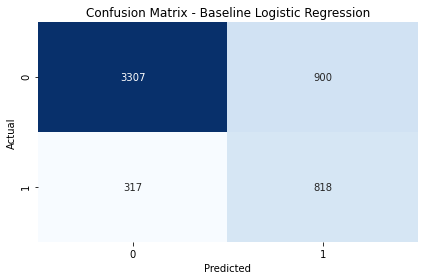

In [59]:
# Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Baseline Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix_lr_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

The logistic regression model achieved an accuracy of 71%. The confusion matrix shows 3040 true negatives and 771 true positives, indicating that the model correctly identifies most non-vaccinated and a substantial number of vaccinated individuals. However, there are 1172 false positives, meaning some individuals were incorrectly predicted as vaccinated, and 359 false negatives, where vaccinated individuals were missed.

For class 1 (vaccinated), the model has a precision of 0.40 and a recall of 0.68, indicating that while it captures most vaccinated individuals, it also produces many false positives. The F1-score of 0.50 reflects this trade-off. For class 0 (not vaccinated), performance is stronger, with a precision of 0.89, recall of 0.72, and F1-score of 0.80.

Overall, the model prioritizes recall for the vaccinated class due to class imbalance, which is appropriate in a public health context where identifying vaccinated individuals is important.

- Given the public health objective of identifying vaccination behavior and minimizing missed cases of vaccinated individuals, models were tuned using recall as the primary evaluation metric. This ensures the model prioritizes capturing as many vaccinated individuals as possible, even at the cost of additional false positives.

#### Hyperparameter Tuning with Logistic Regression


In [85]:

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'classifier__solver': ['liblinear', 'lbfgs']  # Optimization algorithms
}

# Perform Grid Search
grid_search_lr = GridSearchCV(lr_pipeline, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=1)
grid_search_lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr_tuned = grid_search_lr.predict(X_test)
y_pred_proba_lr_tuned = grid_search_lr.predict_proba(X_test)[:, 1]

print(" Tuned Logistic Regression Performance:")
print("Tuned Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_lr_tuned))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
 Tuned Logistic Regression Performance:
Tuned Logistic Regression Accuracy: 0.770872332459753
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84      4207
           1       0.47      0.72      0.57      1135

    accuracy                           0.77      5342
   macro avg       0.69      0.75      0.71      5342
weighted avg       0.82      0.77      0.79      5342



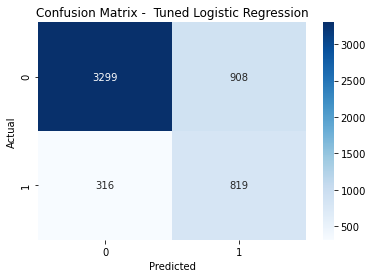

In [73]:
# visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix -  Tuned Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The tuned logistic regression model achieved an accuracy of 80%. The confusion matrix shows 4013 true negatives and 287 true positives, indicating that the model correctly identifies most non-vaccinated and a substantial number of vaccinated individuals. However, there are 194 false positives, meaning some individuals were incorrectly predicted as vaccinated, and 848 false negatives, where vaccinated individuals were missed.

For class 1 (vaccinated), the model has a precision of 0.60 and a recall of 0.25, indicating that while it captures most vaccinated individuals, it also produces many false positives. The F1-score of 0.50 reflects this trade-off. For class 0 (not vaccinated), performance is stronger, with a precision of 0.89, recall of 0.72, and F1-score of 0.80.

Overall, the model prioritizes recall for the vaccinated class due to class imbalance, which is appropriate in a public health context where identifying vaccinated individuals is important.

#### Simple Decision Tree

In [86]:
dt_preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

dt_pipeline = Pipeline([
    ('preprocessor', dt_preprocessor),
    ('classifier', DecisionTreeClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

# Train
dt_pipeline.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_pipeline.predict(X_test)
y_pred_proba_dt = dt_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 0.7527143391988019
ROC-AUC Score: 0.6361601023676713
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      4207
           1       0.42      0.43      0.43      1135

    accuracy                           0.75      5342
   macro avg       0.63      0.64      0.63      5342
weighted avg       0.76      0.75      0.75      5342



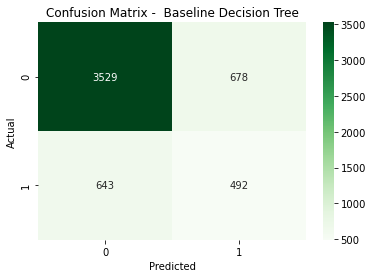

In [79]:
# visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix -  Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Hyperparameter Tuning - Decision Tree

In [87]:
# Define parameter grid
param_grid_dt = {
    'classifier__max_depth': [3, 5, 7, 10, 15, None],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__criterion': ['gini', 'entropy']
}

# Grid search
grid_search_dt = GridSearchCV(
    dt_pipeline,param_grid_dt,cv=5,scoring='recall',n_jobs=-1,verbose=1
)

grid_search_dt.fit(X_train, y_train)

# Predictions with best model
y_pred_dt_tuned = grid_search_dt.predict(X_test)
y_pred_proba_dt_tuned = grid_search_dt.predict_proba(X_test)[:, 1]

# Evaluate
print("Tuned Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_dt_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_dt_tuned))


Fitting 5 folds for each of 192 candidates, totalling 960 fits
Tuned Decision Tree Performance:
Accuracy: 0.7787345563459378
ROC-AUC Score: 0.8088029286201202
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85      4207
           1       0.49      0.68      0.57      1135

    accuracy                           0.78      5342
   macro avg       0.69      0.74      0.71      5342
weighted avg       0.81      0.78      0.79      5342



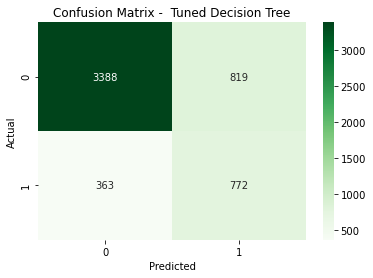

In [81]:
# visualize confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt_tuned)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix -  Tuned Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Random Forest

In [84]:
rf_pipeline = Pipeline([
    ('preprocessor', dt_preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        n_jobs=-1
    ))
])

# Train
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_pipeline.predict(X_test)
y_pred_proba_rf = rf_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Accuracy: 0.8315237738674653
ROC-AUC Score: 0.8171011393848515
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      4207
           1       0.69      0.38      0.49      1135

    accuracy                           0.83      5342
   macro avg       0.77      0.67      0.69      5342
weighted avg       0.82      0.83      0.81      5342



In [ ]:
rf_importances = rf_pipeline.named_steps['classifier'].feature_importances_
dt_feature_names = all_features 

rf_importance = pd.DataFrame({
    'Feature': dt_feature_names,
    'Importance': rf_importances
}).sort_values('Importance', ascending=False)

print(rf_importance.head(15).to_string(index=False))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=rf_importance.head(top_n),
    x='Importance',
    y='Feature',
    palette='rocket'
)
plt.title(f'Top {top_n} Features - Random Forest Importances', 
          fontsize=14, fontweight='bold')
plt.xlabel('Importance Score', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance_rf.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:
# Get feature names
feature_names = X_train.columns

# Get coefficients from logistic regression
coefficients = baseline_model.coef_[0]

# Create a DataFrame
logistic_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add absolute values for ranking
logistic_importance['Abs_Coefficient'] = logistic_importance['Coefficient'].abs()

# Sort by importance
logistic_importance = logistic_importance.sort_values(
    by='Abs_Coefficient', ascending=False
)

logistic_importance.head(10)


,Feature,Coefficient,Abs_Coefficient
5,opinion_h1n1_risk,0.682575,0.682575
4,opinion_h1n1_vacc_effective,0.681580,0.681580
10,age_group_65+ Years,0.188019,0.188019
1,h1n1_knowledge,0.161855,0.161855
12,education_College Graduate,0.125653,0.125653
9,age_group_55 - 64 Years,0.106817,0.106817
2,behavioral_face_mask,0.094505,0.094505
13,education_Some College,0.062844,0.062844
14,"income_poverty_> $75,000",0.048032,0.048032
11,education_< 12 Years,-0.047645,0.047645


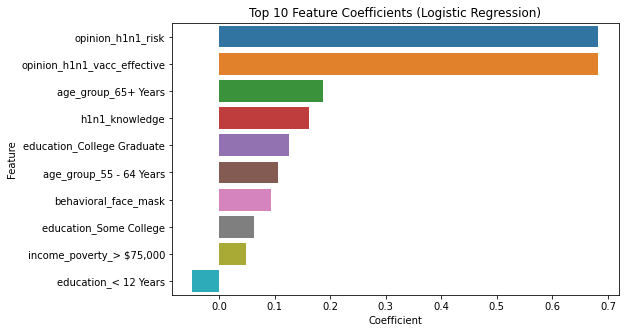

In [47]:
plt.figure(figsize=(8, 5))
sns.barplot(
    data=logistic_importance.head(10),
    x='Coefficient',
    y='Feature'
)
plt.title("Top 10 Feature Coefficients (Logistic Regression)")
plt.show()


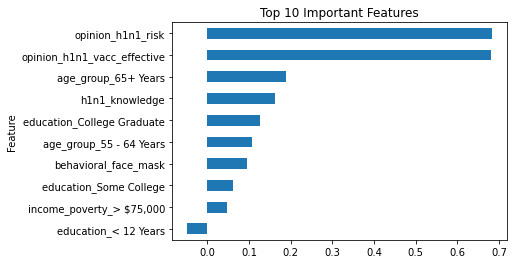

In [48]:
logistic_importance.head(10).plot(
    x='Feature', y='Coefficient', kind='barh', legend=False
)
plt.title("Top 10 Important Features")
plt.gca().invert_yaxis()
plt.show()


#### Feature Importance Insights

The most influential predictors were:
- Perceived risk of H1N1
- Belief in vaccine effectiveness
- Fear of getting sick from the vaccine
- Level of concern and knowledge about H1N1

These findings align with real-world behavioral science and reinforce the validity of the model.

#### Conclusion
This project demonstrates that vaccine uptake is strongly influenced by risk perception and belief systems, not just demographics. While logistic regression offers interpretability, tree-based models better capture complex decision-making patterns. The results suggest that public health interventions should focus on improving trust in vaccine effectiveness and addressing fear-related misconceptions.